<a href="https://colab.research.google.com/github/SARU230/Matplot_lib_for-gromacs/blob/main/gmx_dist_xyz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving 46r_28_Z_XYZ.xvg to 46r_28_Z_XYZ.xvg


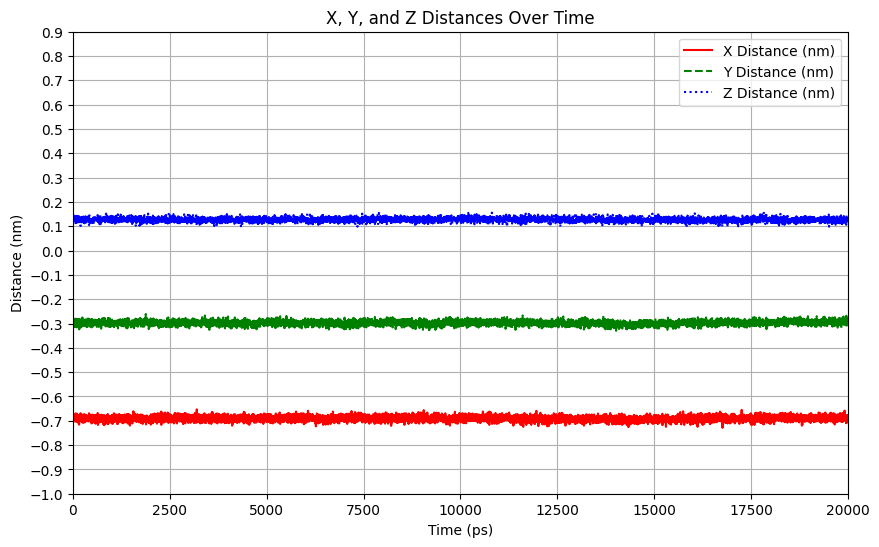

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

def read_xvg(file_path):
    """
    Read an .xvg file and extract time, X, Y, and Z distances.
    """
    time = []
    x_dist = []
    y_dist = []
    z_dist = []

    with open(file_path, 'r') as file:
        for line in file:
            # Skip comments and headers
            if line.startswith('#') or line.startswith('@'):
                continue
            # Split the line into columns
            columns = line.split()
            if len(columns) == 4:  # Ensure there are 4 columns (time, X, Y, Z)
                time.append(float(columns[0]))
                x_dist.append(float(columns[1]))
                y_dist.append(float(columns[2]))
                z_dist.append(float(columns[3]))

    return np.array(time), np.array(x_dist), np.array(y_dist), np.array(z_dist)

def plot_xyz_distances(time, x_dist, y_dist, z_dist, output_file=None):
    """
    Plot X, Y, and Z distances over time with axis limits and spacing.
    """
    plt.figure(figsize=(10, 6))

    # Plot the data
    plt.plot(time, x_dist, label='X Distance (nm)', color='r', linestyle='-')
    plt.plot(time, y_dist, label='Y Distance (nm)', color='g', linestyle='--')
    plt.plot(time, z_dist, label='Z Distance (nm)', color='b', linestyle=':')

    # Set X and Y axis limits
    plt.xlim(0, max(time))  # X-axis from 0 to max time
    plt.ylim(min(min(x_dist), min(y_dist), min(z_dist)) - 0.1,  # Y-axis lower limit
            max(max(x_dist), max(y_dist), max(z_dist)) + 0.1)  # Y-axis upper limit

    # Set major axis spacing
    x_ticks = np.arange(0, max(time) + 1, 2500)  # X-axis ticks every 5 ps
    y_ticks = np.arange(int(min(min(x_dist), min(y_dist), min(z_dist)) - 1),
                        int(max(max(x_dist), max(y_dist), max(z_dist)) + 1), 0.1)  # Y-axis ticks every 0.1 nm
    plt.xticks(x_ticks)
    plt.yticks(y_ticks)

    # Add labels, title, and legend
    plt.xlabel('Time (ps)')
    plt.ylabel('Distance (nm)')
    plt.title('X, Y, and Z Distances Over Time')
    plt.legend()
    plt.grid(True)

    # Save or display the plot
    if output_file:
        plt.savefig(output_file, dpi=300)
        print(f"Plot saved to {output_file}")
    else:
        plt.show()

def main():
    # Upload the .xvg file
    uploaded = files.upload()
    file_name = list(uploaded.keys())[0]  # Get the name of the uploaded file

    # Read the .xvg file
    time, x_dist, y_dist, z_dist = read_xvg(file_name)

    # Plot the data
    plot_xyz_distances(time, x_dist, y_dist, z_dist)

if __name__ == "__main__":
    main()

Saving 46r_28_Z_XYZ.xvg to 46r_28_Z_XYZ (3).xvg


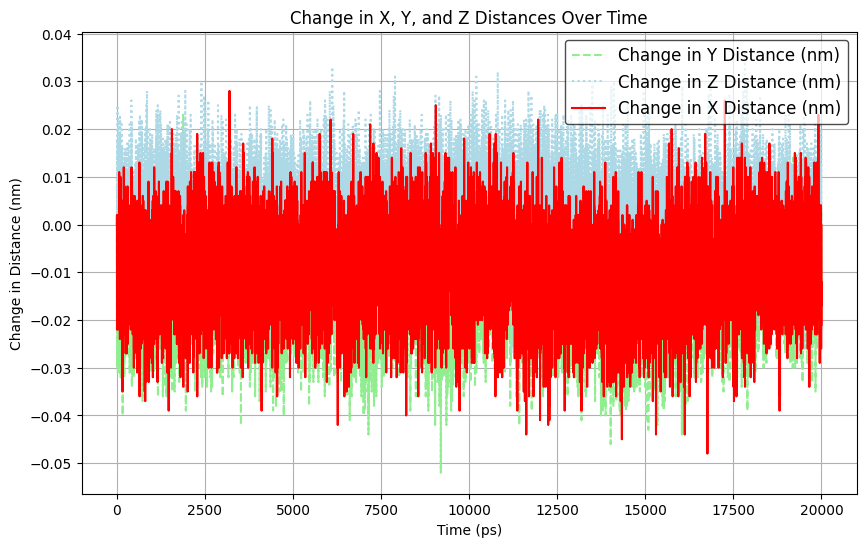

In [ ]:
#Change in distance

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from google.colab import files

def read_xvg(file_path):
    """
    Read an .xvg file and extract time, X, Y, and Z distances.
    """
    time = []
    x_dist = []
    y_dist = []
    z_dist = []

    with open(file_path, 'r') as file:
        for line in file:
            # Skip comments and headers
            if line.startswith('#') or line.startswith('@'):
                continue
            # Split the line into columns
            columns = line.split()
            if len(columns) == 4:  # Ensure there are 4 columns (time, X, Y, Z)
                time.append(float(columns[0]))
                x_dist.append(float(columns[1]))
                y_dist.append(float(columns[2]))
                z_dist.append(float(columns[3]))

    return np.array(time), np.array(x_dist), np.array(y_dist), np.array(z_dist)

def calculate_changes(time, x_dist, y_dist, z_dist):
    """
    Calculate the change in X, Y, and Z distances relative to t = 0.
    """
    # Reference values at t = 0
    x_ref = x_dist[0]
    y_ref = y_dist[0]
    z_ref = z_dist[0]

    # Calculate changes
    x_change = x_dist - x_ref
    y_change = y_dist - y_ref
    z_change = z_dist - z_ref

    return x_change, y_change, z_change

def plot_xyz_changes(time, x_change, y_change, z_change, output_file=None):
    """
    Plot changes in X, Y, and Z distances over time with axis limits and spacing.
    """
    plt.figure(figsize=(10, 6))

    # Plot the data
    plt.plot(time, y_change, label='Change in Y Distance (nm)', color='lightgreen', linestyle='--')
    plt.plot(time, z_change, label='Change in Z Distance (nm)', color='lightblue', linestyle=':')
    plt.plot(time, x_change, label='Change in X Distance (nm)', color='r', linestyle='-')



# Set major axis spacing
    major_spacing_x = 2500  # Set major tick spacing for x-axis (e.g., 1.0 nm)
    major_spacing_y = 0.01  # Set major tick spacing for y-axis (e.g., 1000 bar)

    ax = plt.gca()  # Get the current axis
    ax.xaxis.set_major_locator(ticker.MultipleLocator(major_spacing_x))  # Set x-axis spacing
    ax.yaxis.set_major_locator(ticker.MultipleLocator(major_spacing_y))  # Set y-axis spacing



    # Add labels, title, and legend
    plt.xlabel('Time (ps)')
    plt.ylabel('Change in Distance (nm)')
    plt.title('Change in X, Y, and Z Distances Over Time')
    plt.legend()
    plt.grid(True)

    # Customize the legend
    legend = plt.legend(
    loc="upper right",  # Position the legend
    #title="Distance Legend",  # Add a title
    prop={'size': 12},  # Increase font size
    facecolor="white",  # Set background color
    edgecolor="black",  # Set border color
    framealpha=0.7,  # Set transparency
)

    # Save or display the plot
    if output_file:
        plt.savefig(output_file, dpi=300)
        print(f"Plot saved to {output_file}")
    else:
        plt.show()

def main():
    # Upload the .xvg file
    uploaded = files.upload()
    file_name = list(uploaded.keys())[0]  # Get the name of the uploaded file

    # Read the .xvg file
    time, x_dist, y_dist, z_dist = read_xvg(file_name)

    # Calculate changes in X, Y, and Z distances
    x_change, y_change, z_change = calculate_changes(time, x_dist, y_dist, z_dist)

    # Plot the changes
    plot_xyz_changes(time, x_change, y_change, z_change)

if __name__ == "__main__":
    main()

Saving 46r_28_Z_XYZ.xvg to 46r_28_Z_XYZ (1).xvg


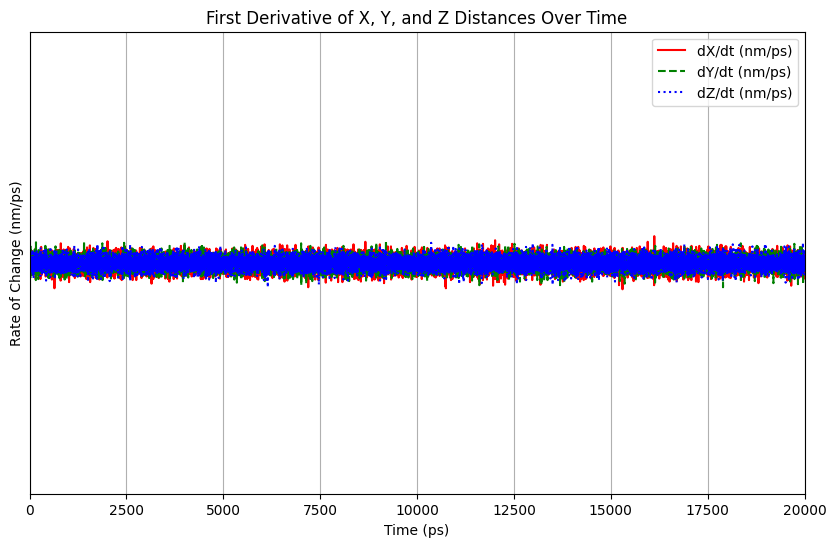

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

def read_xvg(file_path):
    """
    Read an .xvg file and extract time, X, Y, and Z distances.
    """
    time = []
    x_dist = []
    y_dist = []
    z_dist = []

    with open(file_path, 'r') as file:
        for line in file:
            # Skip comments and headers
            if line.startswith('#') or line.startswith('@'):
                continue
            # Split the line into columns
            columns = line.split()
            if len(columns) == 4:  # Ensure there are 4 columns (time, X, Y, Z)
                time.append(float(columns[0]))
                x_dist.append(float(columns[1]))
                y_dist.append(float(columns[2]))
                z_dist.append(float(columns[3]))

    return np.array(time), np.array(x_dist), np.array(y_dist), np.array(z_dist)

def calculate_derivatives(time, x_dist, y_dist, z_dist):
    """
    Calculate the first derivative of X, Y, and Z distances with respect to time.
    """
    # Compute time step (assume uniform time steps)
    dt = time[1] - time[0]

    # Calculate derivatives using finite difference
    x_deriv = np.gradient(x_dist, dt)
    y_deriv = np.gradient(y_dist, dt)
    z_deriv = np.gradient(z_dist, dt)

    return x_deriv, y_deriv, z_deriv

def plot_xyz_derivatives(time, x_deriv, y_deriv, z_deriv, output_file=None):
    """
    Plot the first derivatives of X, Y, and Z distances over time.
    """
    plt.figure(figsize=(10, 6))

    # Plot the data
    plt.plot(time, x_deriv, label='dX/dt (nm/ps)', color='r', linestyle='-')
    plt.plot(time, y_deriv, label='dY/dt (nm/ps)', color='g', linestyle='--')
    plt.plot(time, z_deriv, label='dZ/dt (nm/ps)', color='b', linestyle=':')

    # Set X and Y axis limits
    plt.xlim(0, max(time))  # X-axis from 0 to max time
    plt.ylim(min(min(x_deriv), min(y_deriv), min(z_deriv)) - 0.1,  # Y-axis lower limit
            max(max(x_deriv), max(y_deriv), max(z_deriv)) + 0.1)  # Y-axis upper limit

    # Set major axis spacing
    x_ticks = np.arange(0, max(time) + 1, 2500)  # X-axis ticks every 5 ps
    y_ticks = np.arange(int(min(min(x_deriv), min(y_deriv), min(z_deriv)) - 0.01),
                        int(max(max(x_deriv), max(y_deriv), max(z_deriv)) + 0.01), 0.0001)  # Y-axis ticks every 0.1 nm/ps
    plt.xticks(x_ticks)
    plt.yticks(y_ticks)

    # Add labels, title, and legend
    plt.xlabel('Time (ps)')
    plt.ylabel('Rate of Change (nm/ps)')
    plt.title('First Derivative of X, Y, and Z Distances Over Time')
    plt.legend()
    plt.grid(True)

    # Save or display the plot
    if output_file:
        plt.savefig(output_file, dpi=300)
        print(f"Plot saved to {output_file}")
    else:
        plt.show()

def main():
    # Upload the .xvg file
    uploaded = files.upload()
    file_name = list(uploaded.keys())[0]  # Get the name of the uploaded file

    # Read the .xvg file
    time, x_dist, y_dist, z_dist = read_xvg(file_name)

    # Calculate the first derivatives
    x_deriv, y_deriv, z_deriv = calculate_derivatives(time, x_dist, y_dist, z_dist)

    # Plot the derivatives
    plot_xyz_derivatives(time, x_deriv, y_deriv, z_deriv)

if __name__ == "__main__":
    main()